# Supplementary Figure of Butterworth Filters

In this notebook, we provide a simple comparison between a lowpass and bandpass filter. Note this notebook is focused on the depiction of the gain function $G_{\rm Db}(\omega)$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 24})

In [17]:
# Frequencies (see supp mat)
fq1 = 100
fq2 = 200
W = fq2 - fq1
f0 = np.sqrt(fq1*fq2)

# Order of filter
n = 3

# Compute lowpass filter
b, a = signal.butter(n, fq1, 'low', analog=True)
w, h = signal.freqs(b, a)

# Compute bandpass filter
b1, a1 = signal.butter(n, [fq1, fq2], 'bandpass', analog=True)
w1, h1 = signal.freqs(b1, a1, worN=500)

# Compute the analytic transfer function
hlp = 1/np.sqrt(1 + (w/fq1)**(2*n))
hbp = 1/np.sqrt(1 + ((w1/(f0) - f0/(w1))*(f0/W))**(2*n))

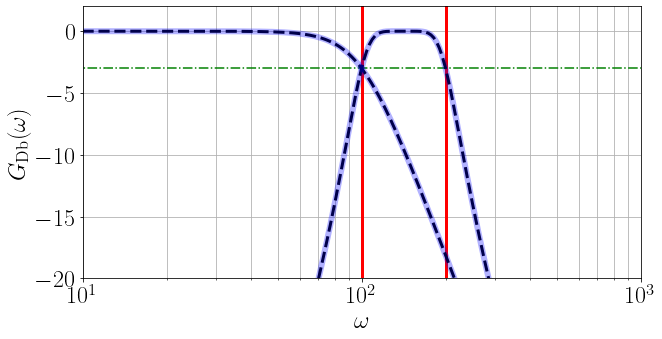

In [19]:
fig = plt.figure(figsize=(10, 5))

plt.plot(w1, 20*np.log10(np.abs(h1)), color='k', linestyle='--', linewidth=3)
plt.plot(w, 20*np.log10(np.abs(h)), color='k', linestyle='--', linewidth=3)
plt.plot(w, 20*np.log10(np.abs(hlp)), color='b', linestyle='-', linewidth=6, alpha=0.3)
plt.plot(w1, 20*np.log10(np.abs(hbp)), color='b', linestyle='-', linewidth=6, alpha=0.3)

plt.vlines(fq1, 5, -200, color='r', linewidth=3)
plt.vlines(fq2, 5, -200, color='r', linewidth=3)
plt.hlines(-3, 0, 1000, color='g', linestyle='-.')

plt.ylabel(r'$G_{\rm Db}(\omega)$')
plt.xlabel(r'$\omega$')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.xscale('log')
plt.xlim([10, 1000])
plt.ylim([-20, 2])

plt.show()
